# Tanh - Hyperbolic Tangent Function

## Math behind it
---

**Tanh Function**

The tanh function maps real values to the range (-1, 1). It's defined as: 

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}
$$

Advantages: 
- Outputs are zero-centered, leading to faster convergence as opposed to sigmoid 
- Smooth and differentiable everywhere

Disadvantages: 
- Vanishing gradient problem, where for large $ |x| $ the tanh function saturates making its derivative approach zero, causing the gradient to shrink as it propagates backward across layers 


<br><br>
**Derivative of Tanh**

The derivative is used during backpropagation to compute gradients which are used to update weights

$$
\frac{d}{dx} \tanh(x) = \mathrm{sech}^2(x) = 1 - \tanh^2(x)
$$

>note: the hyperbolic identity of $ \tanh^2(x) + \mathrm{sech}^2(x) = 1 $ is used to simplify.


<br><br>
**Taylor Series Expansion of $e^x$**

The tanh function utilizes the exponential term $ e^{2x} $, so it is useful for us to approximate the exponential function ($e^x$) with the following Taylor (Maclaurin) series expansion:

$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

>note:  
>The infinite series converges for all $x$, however for practicality we use just a partial sum where accuracy grows as more taylor series terms are computed, but at the expense of performance



## Code
---

In [16]:
class Tanh: 
    def __init__(self):
        pass

    def __call__(self, x):
        exp_2x = self._exp(2*x)
        return (exp_2x - 1) / (exp_2x + 1)
    
    def _exp(self, x, terms=100):
        result = 1.0
        factorial = 1 
        power = 1 

        for n in range(1, terms):
            factorial *= n 
            power *= x 
            result += power / factorial 
        return result 

    def derivative(self, x):
        tanh = self.__call__(x)
        return 1 - tanh**2
            

## Testing
---

### Imports

In [17]:
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Test Tanh Output and Plot Function 

========== Testing ===========
Testing Tanh:
  x = -10 -> Tanh(x) =  -1.0000, Expected ≈  -0.9999  |  Tanh'(x) =   0.0000
  x =  -1 -> Tanh(x) =  -0.7616, Expected ≈  -0.7616  |  Tanh'(x) =   0.4200
  x =   0 -> Tanh(x) =   0.0000, Expected ≈   0.0000  |  Tanh'(x) =   1.0000
  x =   1 -> Tanh(x) =   0.7616, Expected ≈   0.7616  |  Tanh'(x) =   0.4200
  x =  10 -> Tanh(x) =   1.0000, Expected ≈   0.9999  |  Tanh'(x) =   0.0000

======= Plotting Tanh ========


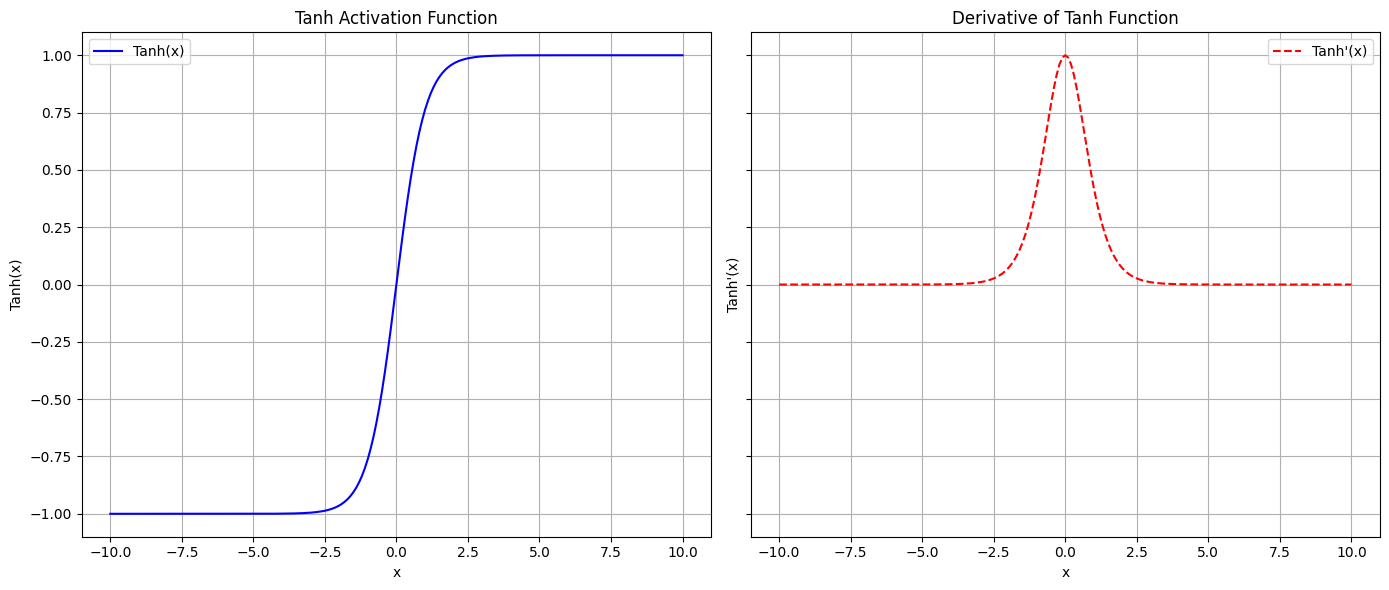

In [18]:
import matplotlib.pyplot as plt

# intialize Tanh
tanh = Tanh()


# Test values
test_inputs = [-10, -1, 0, 1, 10]
expected_output = [-0.9999, -0.7616, 0.0000, 0.7616, 0.9999] # approx values based on computing tanh with a calculator

print(" Testing ".center(30, "="))
print("Testing Tanh:")
for i in range(len(test_inputs)):
    x = test_inputs[i]
    y = tanh(x)
    dy = tanh.derivative(x)
    print(f"  x = {x:>3} -> Tanh(x) = {y:>8.4f}, Expected ≈ {expected_output[i]:>8.4f}  |  Tanh'(x) = {dy:>8.4f}")



# Plot
print()
print(" Plotting Tanh ".center(30, "="))

x_values = [x * 0.1 for x in range(-100, 101)]  # From -10 to 10 with step 0.1
tanh_values = [tanh(x) for x in x_values]
tanh_derivative_values = [tanh.derivative(x) for x in x_values]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot Tanh function
axs[0].plot(x_values, tanh_values, label="Tanh(x)", color='blue')
axs[0].set_title("Tanh Activation Function")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Tanh(x)")
axs[0].grid(True)
axs[0].legend()

# Plot Tanh derivative
axs[1].plot(x_values, tanh_derivative_values, label="Tanh'(x)", color='red', linestyle='dashed')
axs[1].set_title("Derivative of Tanh Function")
axs[1].set_xlabel("x")
axs[1].set_ylabel("Tanh'(x)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()